In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
from sklearn.datasets import load_iris

In [16]:
# Load the Iris dataset
iris = pd.read_csv("Iris.csv")

In [17]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Some Exploratory Data Analysis With Iris

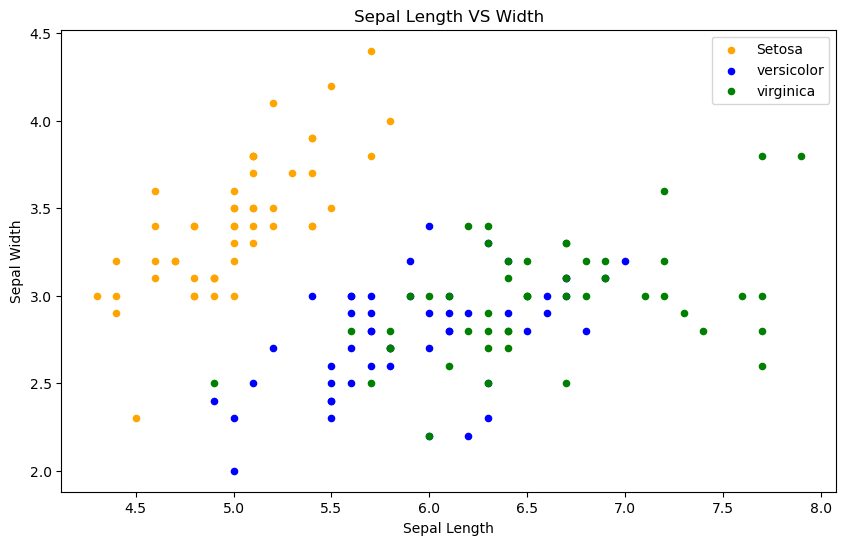

In [24]:
fig = iris[iris.species=='setosa'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='orange', label='Setosa')
iris[iris.species=='versicolor'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='blue', label='versicolor',ax=fig)
iris[iris.species=='virginica'].plot(kind='scatter',x='sepal_length',y='sepal_width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

# The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.

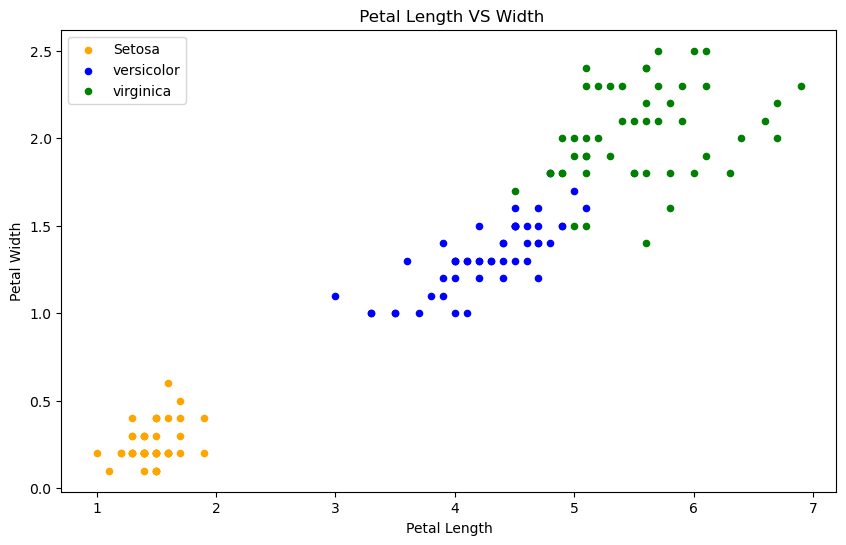

In [25]:
fig = iris[iris.species=='setosa'].plot.scatter(x='petal_length',y='petal_width',color='orange', label='Setosa')
iris[iris.species=='versicolor'].plot.scatter(x='petal_length',y='petal_width',color='blue', label='versicolor',ax=fig)
iris[iris.species=='virginica'].plot.scatter(x='petal_length',y='petal_width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

# As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.

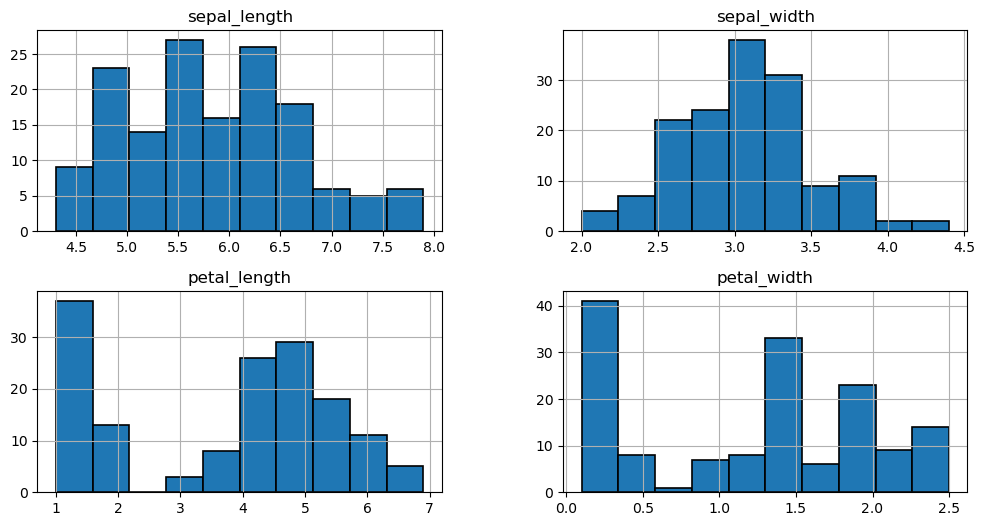

In [26]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

<Axes: xlabel='species', ylabel='sepal_width'>

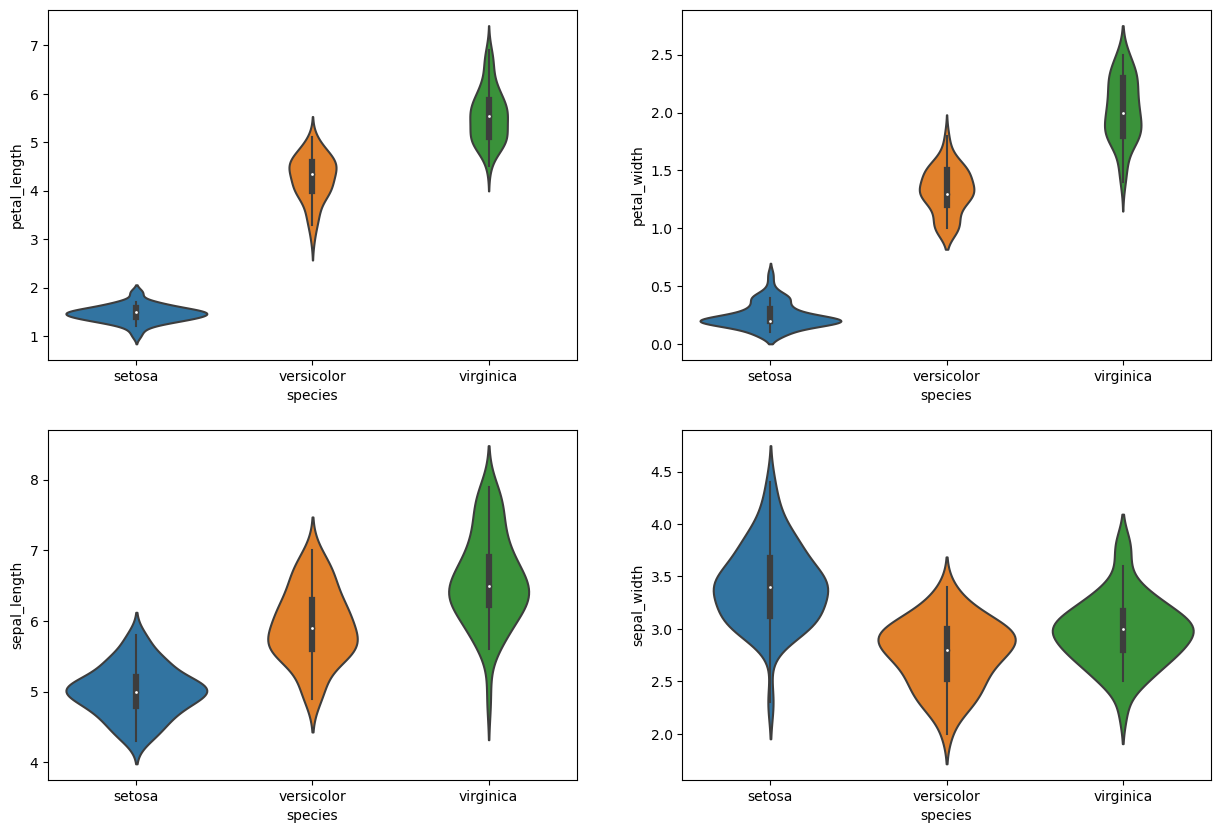

In [27]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=iris)

# The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density

# Before we start, we need to clear some ML notations.

attributes-->An attribute is a property of an instance that may be used to determine its classification. In the following dataset, the attributes are the petal and sepal length and width. It is also known as Features.

Target variable, in the machine learning context is the variable that is or should be the output. Here the target variables are the 3 flower species.



In [29]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

In [30]:
iris.shape #get the shape of the dataset

(150, 5)

# Train the algorithm
Now, when we train any algorithm, the number of features and their correlation plays an important role. 
If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

C:\Users\kunal\AppData\Local\Temp\ipykernel_11568\3758379432.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())


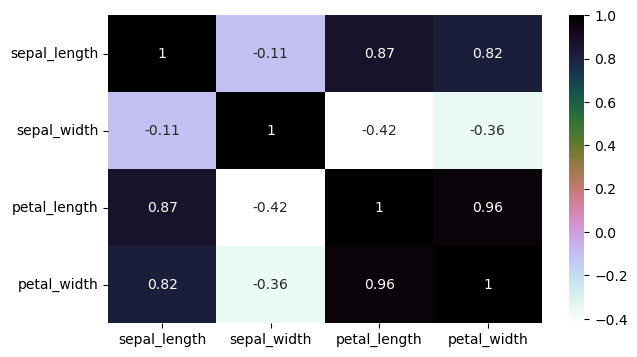

In [31]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

# Observation--->

The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

# Steps To Be followed When Applying an Algorithm¶
Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
Then pass the training dataset to the algorithm to train it. We use the .fit() method
Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
We then check the accuracy by passing the predicted outcome and the actual output to the model.

# Splitting The Data into Training And Testing Dataset¶


In [32]:
train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [35]:
train_X = train[['sepal_length','sepal_width','petal_length','petal_width']]# taking the training data features
train_y=train.species# output of our training data
test_X= test[['sepal_length','sepal_width','petal_length','petal_width']] # taking test data features
test_y =test.species   #output value of test data

In [36]:
#Lets check the Train and Test Dataset
train_X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
8,4.4,2.9,1.4,0.2
10,5.4,3.7,1.5,0.2


In [37]:
test_X.head(2)

,sepal_length,sepal_width,petal_length,petal_width
63,6.1,2.9,4.7,1.4
144,6.7,3.3,5.7,2.5


In [38]:
train_y.head()  ##output of the training data

8          setosa
10         setosa
139     virginica
71     versicolor
53     versicolor
Name: species, dtype: object

In [39]:
#Support Vector Machine (SVM)
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 0.9555555555555556


In [40]:
#Logistic Regression
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9555555555555556


In [41]:
#Decision Tree
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9555555555555556


# Creatng Petals And Sepals Training Data


In [42]:
petal=iris[['petal_length','petal_width','species']]
sepal=iris[['sepal_length','sepal_width','species']]

In [45]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['petal_width','petal_length']]
train_y_p=train_p.species
test_x_p=test_p[['petal_width','petal_length']]
test_y_p=test_p.species

train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['sepal_width','sepal_length']]
train_y_s=train_s.species
test_x_s=test_s[['sepal_width','sepal_length']]
test_y_s=test_s.species


In [46]:
#Support Vector Machine
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


In [47]:
#Logistic Regression
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.9777777777777777
The accuracy of the Logistic Regression using Sepals is: 0.8222222222222222


In [48]:
#Decission Tree
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6666666666666666


# Observations:
Using Petals over Sepal for training the data gives a much better accuracy.
This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.